# Amirhossein Heydarian Ardakani 400123174
## Codes for Neural Networks and Deep Learning - Michael Nielsen

In [1]:
!git clone https://github.com/amirhosseinh77/neural-networks-and-deep-learning.git
%cd neural-networks-and-deep-learning
!pip install theano

import warnings
warnings.filterwarnings('ignore')

Cloning into 'neural-networks-and-deep-learning'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 104 (delta 24), reused 28 (delta 14), pack-reused 56
Receiving objects: 100% (104/104), 16.64 MiB | 29.08 MiB/s, done.
Resolving deltas: 100% (52/52), done.
/content/neural-networks-and-deep-learning
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 46.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668112 sha256=9067e19e73c976f81c9a41f6af305953be30b3bdbee4eff4a919acd5fee0ac93
  Stored in directory: /root/.cache/pip/wheels/84/cb/19/235b5b10d89b4621f685112f8762681570a9fa14dc1ce904d9
Successfully built theano


### chapter 1 - read the input data.

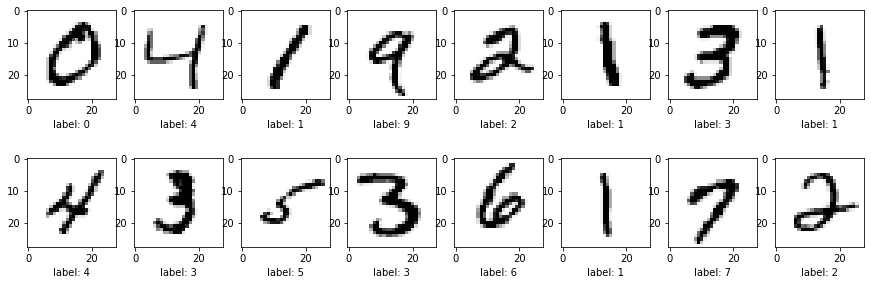

In [2]:
from elements import mnist_loader
import numpy as np
import matplotlib.pyplot as plt

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)

plt.figure(figsize=(15,5))
for i in range(1,17):
    plt.subplot(2,8,i)
    plt.imshow(training_data[i][0].reshape(28,28), cmap='Greys')
    plt.xlabel(f'label: {np.argmax(training_data[i][1])}')
plt.show()

### chapter 1 - network.py example.

In [ ]:
from elements import network
from elements import mnist_loader

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)

net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0 : 8987 / 10000
Epoch 1 : 9200 / 10000
Epoch 2 : 9322 / 10000
Epoch 3 : 9376 / 10000
Epoch 4 : 9410 / 10000
Epoch 5 : 9412 / 10000
Epoch 6 : 9425 / 10000
Epoch 7 : 9425 / 10000
Epoch 8 : 9470 / 10000
Epoch 9 : 9469 / 10000
Epoch 10 : 9433 / 10000
Epoch 11 : 9470 / 10000
Epoch 12 : 9479 / 10000
Epoch 13 : 9466 / 10000
Epoch 14 : 9510 / 10000
Epoch 15 : 9487 / 10000
Epoch 16 : 9484 / 10000
Epoch 17 : 9502 / 10000
Epoch 18 : 9512 / 10000
Epoch 19 : 9514 / 10000
Epoch 20 : 9505 / 10000
Epoch 21 : 9545 / 10000
Epoch 22 : 9524 / 10000
Epoch 23 : 9518 / 10000
Epoch 24 : 9511 / 10000
Epoch 25 : 9527 / 10000
Epoch 26 : 9528 / 10000
Epoch 27 : 9519 / 10000
Epoch 28 : 9501 / 10000
Epoch 29 : 9515 / 10000


### chapter 2 - network2.py example.

In [ ]:
from elements import network2
from elements import mnist_loader

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)

net = network2.Network([784, 30, 10], cost=network2.CrossEntropyCost)
#net.large_weight_initializer()
evaluation_cost, evaluation_accuracy, training_cost, training_accuracy = \
    net.SGD(training_data, 30, 10, 0.1, lmbda = 5.0, evaluation_data=validation_data, monitor_evaluation_accuracy=True)

Epoch 0 training complete
Accuracy on evaluation data: 9271 / 10000
Epoch 1 training complete
Accuracy on evaluation data: 9423 / 10000
Epoch 2 training complete
Accuracy on evaluation data: 9489 / 10000
Epoch 3 training complete
Accuracy on evaluation data: 9515 / 10000
Epoch 4 training complete
Accuracy on evaluation data: 9552 / 10000
Epoch 5 training complete
Accuracy on evaluation data: 9569 / 10000
Epoch 6 training complete
Accuracy on evaluation data: 9564 / 10000
Epoch 7 training complete
Accuracy on evaluation data: 9573 / 10000
Epoch 8 training complete
Accuracy on evaluation data: 9584 / 10000
Epoch 9 training complete
Accuracy on evaluation data: 9597 / 10000
Epoch 10 training complete
Accuracy on evaluation data: 9598 / 10000
Epoch 11 training complete
Accuracy on evaluation data: 9609 / 10000
Epoch 12 training complete
Accuracy on evaluation data: 9616 / 10000
Epoch 13 training complete
Accuracy on evaluation data: 9621 / 10000
Epoch 14 training complete
Accuracy on evalu

### chapter 3 - Overfitting example - too many epochs of learning applied on small (1k samples) amount of data. Overfitting is treating noise as a signal.

In [ ]:
from elements import network2
from elements import mnist_loader

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)

net = network2.Network([784, 30, 10], cost=network2.CrossEntropyCost)
net.large_weight_initializer()
evaluation_cost, evaluation_accuracy, training_cost, training_accuracy = \
    net.SGD(training_data[:1000], 400, 10, 0.5, evaluation_data=test_data,
    monitor_evaluation_cost=True,
    monitor_evaluation_accuracy=True,
    monitor_training_cost=True,
    monitor_training_accuracy=True)

Epoch 0 training complete
Cost on training data: 1.8190217461210199
Accuracy on training data: 653 / 1000
Cost on evaluation data: 2.20515439650697
Accuracy on evaluation data: 5423 / 10000
Epoch 1 training complete
Cost on training data: 1.2952284866159138
Accuracy on training data: 801 / 1000
Cost on evaluation data: 1.7512553282067156
Accuracy on evaluation data: 6662 / 10000
Epoch 2 training complete
Cost on training data: 1.06319139272246
Accuracy on training data: 853 / 1000
Cost on evaluation data: 1.57554801111598
Accuracy on evaluation data: 7134 / 10000
Epoch 3 training complete
Cost on training data: 0.914761385830091
Accuracy on training data: 882 / 1000
Cost on evaluation data: 1.5015445471270783
Accuracy on evaluation data: 7361 / 10000
Epoch 4 training complete
Cost on training data: 0.7740499254722
Accuracy on training data: 898 / 1000
Cost on evaluation data: 1.3816325998905399
Accuracy on evaluation data: 7591 / 10000
Epoch 5 training complete
Cost on training data: 0

Text(0.5, 0, 'Epoch')

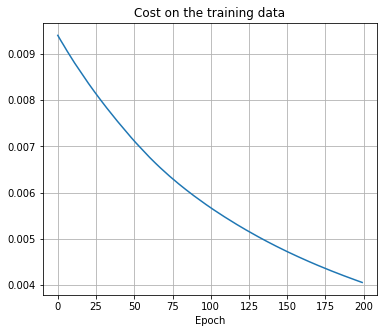

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(training_cost[200:])
plt.grid()
plt.title('Cost on the training data')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

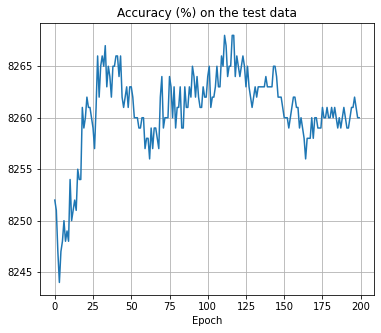

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(evaluation_accuracy[200:])
plt.grid()
plt.title('Accuracy (%) on the test data')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

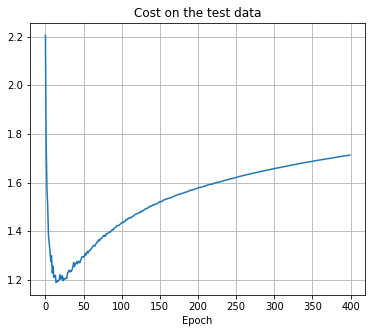

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(evaluation_cost)
plt.grid()
plt.title('Cost on the test data')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

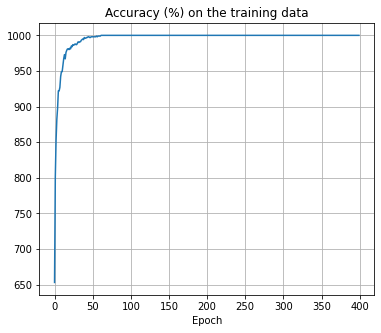

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(training_accuracy)
plt.grid()
plt.title('Accuracy (%) on the training data')
plt.xlabel('Epoch')

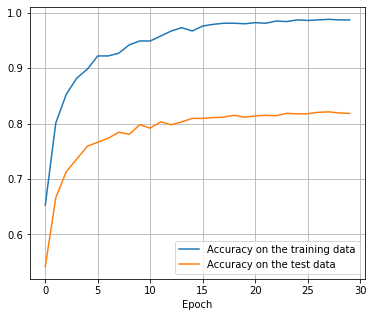

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(np.array(training_accuracy[:30])/1000)
plt.plot(np.array(evaluation_accuracy[:30])/10000)

plt.grid()
plt.xlabel('Epoch')
plt.legend(['Accuracy on the training data','Accuracy on the test data'])

### chapter 3 - Regularization (weight decay) example 1 (only 1000 of training data and 30 hidden neurons)

In [ ]:
from elements import network2
from elements import mnist_loader

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)

net = network2.Network([784, 30, 10], cost=network2.CrossEntropyCost)
net.large_weight_initializer()
evaluation_cost, evaluation_accuracy, training_cost, training_accuracy = \
    net.SGD(training_data[:1000], 400, 10, 0.5,
    evaluation_data=test_data,
    lmbda = 0.1, # this is a regularization parameter
    monitor_evaluation_cost=True,
    monitor_evaluation_accuracy=True,
    monitor_training_cost=True,
    monitor_training_accuracy=True)

Epoch 0 training complete
Cost on training data: 1189.527095290911
Accuracy on training data: 698 / 1000
Cost on evaluation data: 1189.8550511013198
Accuracy on evaluation data: 6009 / 10000
Epoch 1 training complete
Cost on training data: 1179.5939837457465
Accuracy on training data: 799 / 1000
Cost on evaluation data: 1180.0144219542087
Accuracy on evaluation data: 6744 / 10000
Epoch 2 training complete
Cost on training data: 1170.4059690893648
Accuracy on training data: 840 / 1000
Cost on evaluation data: 1170.8789797423315
Accuracy on evaluation data: 7073 / 10000
Epoch 3 training complete
Cost on training data: 1161.0808386660801
Accuracy on training data: 890 / 1000
Cost on evaluation data: 1161.6027380549638
Accuracy on evaluation data: 7468 / 10000
Epoch 4 training complete
Cost on training data: 1152.0774786279164
Accuracy on training data: 896 / 1000
Cost on evaluation data: 1152.6463446673986
Accuracy on evaluation data: 7633 / 10000
Epoch 5 training complete
Cost on trainin

Text(0.5, 0, 'Epoch')

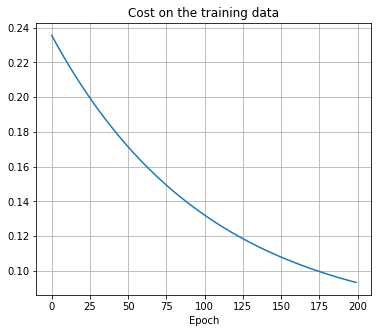

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(np.array(training_cost[200:])/1000)
plt.grid()
plt.title('Cost on the training data')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

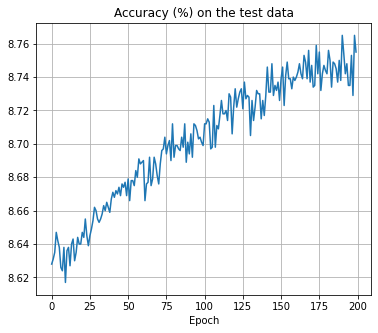

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(np.array(evaluation_accuracy[200:])/1000)
plt.grid()
plt.title('Accuracy (%) on the test data')
plt.xlabel('Epoch')

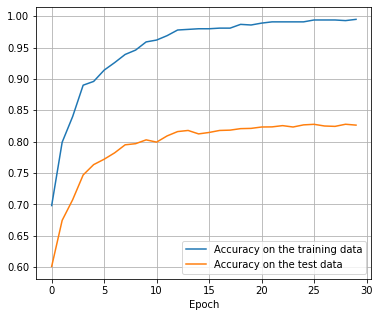

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(np.array(training_accuracy[:30])/1000)
plt.plot(np.array(evaluation_accuracy[:30])/10000)

plt.grid()
plt.xlabel('Epoch')
plt.legend(['Accuracy on the training data','Accuracy on the test data'])

### chapter 3 - Early stopping implemented

In [ ]:
from elements import network2
from elements import mnist_loader

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)

net = network2.Network([784, 30, 10], cost=network2.CrossEntropyCost)
evaluation_cost, evaluation_accuracy, training_cost, training_accuracy = \
    net.SGD(training_data[:1000], 30, 10, 0.5,
    lmbda=5.0,
    evaluation_data=validation_data,
    monitor_evaluation_accuracy=True,
    monitor_training_cost=True,
    early_stopping_n=10)

Epoch 0 training complete
Cost on training data: 301.2561650219777
Accuracy on evaluation data: 7455 / 10000
Epoch 1 training complete
Cost on training data: 439.232945332555
Accuracy on evaluation data: 8213 / 10000
Epoch 2 training complete
Cost on training data: 515.5930110598646
Accuracy on evaluation data: 8406 / 10000
Epoch 3 training complete
Cost on training data: 555.6494874830328
Accuracy on evaluation data: 8574 / 10000
Epoch 4 training complete
Cost on training data: 577.361869837528
Accuracy on evaluation data: 7923 / 10000
Epoch 5 training complete
Cost on training data: 594.697554039724
Accuracy on evaluation data: 8555 / 10000
Epoch 6 training complete
Cost on training data: 605.2460972335653
Accuracy on evaluation data: 8649 / 10000
Epoch 7 training complete
Cost on training data: 612.7769103897504
Accuracy on evaluation data: 8599 / 10000
Epoch 8 training complete
Cost on training data: 613.8251825233201
Accuracy on evaluation data: 8628 / 10000
Epoch 9 training compl

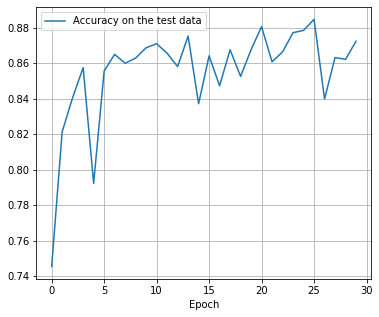

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(np.array(evaluation_accuracy)/10000)

plt.grid()
plt.xlabel('Epoch')
plt.legend(['Accuracy on the test data'])

### chapter 5 - The vanishing gradient problem - deep networks are hard to train with simple SGD algorithm this network learns much slower than a shallow one.

In [ ]:
from elements import network2
from elements import mnist_loader

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)

net = network2.Network([784, 30, 30, 30, 30, 10], cost=network2.CrossEntropyCost)
evaluation_cost, evaluation_accuracy, training_cost, training_accuracy = \
    net.SGD(training_data, 30, 10, 0.1,
    lmbda=5.0,
    evaluation_data=validation_data,
    monitor_evaluation_accuracy=True)

Epoch 0 training complete
Accuracy on evaluation data: 2584 / 10000
Epoch 1 training complete
Accuracy on evaluation data: 7714 / 10000
Epoch 2 training complete
Accuracy on evaluation data: 9120 / 10000
Epoch 3 training complete
Accuracy on evaluation data: 9188 / 10000
Epoch 4 training complete
Accuracy on evaluation data: 9379 / 10000
Epoch 5 training complete
Accuracy on evaluation data: 9417 / 10000
Epoch 6 training complete
Accuracy on evaluation data: 9473 / 10000
Epoch 7 training complete
Accuracy on evaluation data: 9381 / 10000
Epoch 8 training complete
Accuracy on evaluation data: 9520 / 10000
Epoch 9 training complete
Accuracy on evaluation data: 9518 / 10000
Epoch 10 training complete
Accuracy on evaluation data: 9570 / 10000
Epoch 11 training complete
Accuracy on evaluation data: 9540 / 10000
Epoch 12 training complete
Accuracy on evaluation data: 9523 / 10000
Epoch 13 training complete
Accuracy on evaluation data: 9572 / 10000
Epoch 14 training complete
Accuracy on evalu

### chapter 6 - shallow architecture using just a single hidden layer, containing 100 hidden neurons.


In [ ]:
from elements import network3
from elements.network3 import Network
from elements.network3 import ConvPoolLayer, FullyConnectedLayer, SoftmaxLayer

# read data:
training_data, validation_data, test_data = network3.load_data_shared()

# mini-batch size:
mini_batch_size = 10

net = Network([
    FullyConnectedLayer(n_in=784, n_out=100),
    SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)

net.SGD(training_data, 60, mini_batch_size, 0.1, validation_data, test_data)

Trying to run under a GPU.  If this is not desired, then modify network3.py
to set the GPU flag to False.


Training mini-batch number 0
Training mini-batch number 1000
Training mini-batch number 2000
Training mini-batch number 3000
Training mini-batch number 4000
Epoch 0: validation accuracy 92.56%
This is the best validation accuracy to date.
The corresponding test accuracy is 91.93%
Training mini-batch number 5000
Training mini-batch number 6000
Training mini-batch number 7000
Training mini-batch number 8000
Training mini-batch number 9000
Epoch 1: validation accuracy 94.43%
This is the best validation accuracy to date.
The corresponding test accuracy is 94.13%
Training mini-batch number 10000
Training mini-batch number 11000
Training mini-batch number 12000
Training mini-batch number 13000
Training mini-batch number 14000
Epoch 2: validation accuracy 95.55%
This is the best validation accuracy to date.
The corresponding test accuracy is 95.12%
Training mini-batch number 15000
Training mini-batch number 16000
Training mini-batch number 17000
Training mini-batch number 18000
Training mini-

### chapter 6 - 5x5 local receptive fields, 20 feature maps, max-pooling layer 2x2

In [ ]:
from elements import network3
from elements.network3 import Network
from elements.network3 import ConvPoolLayer, FullyConnectedLayer, SoftmaxLayer

# read data:
training_data, validation_data, test_data = network3.load_data_shared()

# mini-batch size:
mini_batch_size = 10

net = Network([
    ConvPoolLayer(image_shape=(mini_batch_size, 1, 28, 28),
                  filter_shape=(20, 1, 5, 5),
                  poolsize=(2, 2)),
    FullyConnectedLayer(n_in=20*12*12, n_out=100),
    SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)

net.SGD(training_data, 60, mini_batch_size, 0.1, validation_data, test_data)

/usr/local/lib/python3.8/dist-packages/theano/tensor/nnet/conv.py:98: UserWarning: theano.tensor.nnet.conv.conv2d is deprecated. Use theano.tensor.nnet.conv2d instead.
  warnings.warn("theano.tensor.nnet.conv.conv2d is deprecated."


Training mini-batch number 0
Training mini-batch number 1000
Training mini-batch number 2000
Training mini-batch number 3000
Training mini-batch number 4000
Epoch 0: validation accuracy 93.40%
This is the best validation accuracy to date.
The corresponding test accuracy is 93.01%
Training mini-batch number 5000
Training mini-batch number 6000
Training mini-batch number 7000
Training mini-batch number 8000
Training mini-batch number 9000
Epoch 1: validation accuracy 95.84%
This is the best validation accuracy to date.
The corresponding test accuracy is 95.64%
Training mini-batch number 10000
Training mini-batch number 11000
Training mini-batch number 12000
Training mini-batch number 13000
Training mini-batch number 14000
Epoch 2: validation accuracy 97.14%
This is the best validation accuracy to date.
The corresponding test accuracy is 96.97%
Training mini-batch number 15000
Training mini-batch number 16000
Training mini-batch number 17000
Training mini-batch number 18000
Training mini-

### chapter 6 - inserting a second convolutional-pooling layer to the previous example => better accuracy

In [ ]:
from elements import network3
from elements.network3 import Network
from elements.network3 import ConvPoolLayer, FullyConnectedLayer, SoftmaxLayer

# read data:
training_data, validation_data, test_data = network3.load_data_shared()

# mini-batch size:
mini_batch_size = 10

net = Network([
    ConvPoolLayer(image_shape=(mini_batch_size, 1, 28, 28),
                  filter_shape=(20, 1, 5, 5),
                  poolsize=(2, 2)),
    ConvPoolLayer(image_shape=(mini_batch_size, 20, 12, 12),
                  filter_shape=(40, 20, 5, 5),
                  poolsize=(2, 2)),
    FullyConnectedLayer(n_in=40*4*4, n_out=100),
    SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)

net.SGD(training_data, 60, mini_batch_size, 0.1, validation_data, test_data)

### chapter 6 -  rectified linear units and some l2 regularization (lmbda=0.1) => even better accuracy


In [ ]:
from elements import network3
from elements.network3 import Network
from elements.network3 import ConvPoolLayer, FullyConnectedLayer, SoftmaxLayer, ReLU

# read data:
training_data, validation_data, test_data = network3.load_data_shared()

# mini-batch size:
mini_batch_size = 10

net = Network([
    ConvPoolLayer(image_shape=(mini_batch_size, 1, 28, 28),
                  filter_shape=(20, 1, 5, 5),
                  poolsize=(2, 2),
                  activation_fn=ReLU),
    ConvPoolLayer(image_shape=(mini_batch_size, 20, 12, 12),
                  filter_shape=(40, 20, 5, 5),
                  poolsize=(2, 2),
                  activation_fn=ReLU),
    FullyConnectedLayer(n_in=40*4*4, n_out=100, activation_fn=ReLU),
    SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)

net.SGD(training_data, 60, mini_batch_size, 0.03, validation_data, test_data, lmbda=0.1)